In [2]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from modules.cleaners import clean_text
import string
from textblob import TextBlob
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)


In [3]:
#create dataframe with year, president and party columns
df = pd.read_csv('data/US presidents.csv', delimiter=';')
#rename column for easier reading
df.rename(columns={'Years (after inauguration)': 'Year'}, inplace=True)

In [4]:
#make a series with the filenames
path = 'speeches/'
files = pd.Series(sorted(os.listdir(path))).map(lambda x: x[:-4])

In [5]:
#method that returns dict with key: year (int) value: speech (str)
def get_text_dict():
    txtdict = {}

    for file in files:
        file_ = path + file + '.txt'
        f = open(file_, encoding='utf8', errors='ignore')
        filetxt = f.read()
        txtdict[int(file)] = filetxt

    return txtdict

In [6]:
text = get_text_dict()

In [7]:
#add series to df with speeches from dict values
speech_list = list(text.values())
#print(speech_list[2:3])
sp = pd.Series(speech_list)
df['Speech'] = sp
df.Speech[0:2]

0    To the Senate and House of Representatives: \n...
1    To the Senate and House of Representatives: \n...
Name: Speech, dtype: object

In [8]:
#check how dataframe looks
dataTypeSeries = df.dtypes
print(dataTypeSeries)

Year          int64
President    object
Party        object
Speech       object
dtype: object


In [9]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [10]:
df['Polarity'] = df['Speech'].apply(sentiment).apply(lambda x: x[0])
df['Subjectivity'] = df['Speech'].apply(sentiment).apply(lambda x: x[1])

In [11]:
df

,Year,President,Party,Speech,Polarity,Subjectivity
0,1900,William McKinley,Republican,To the Senate and House of Representatives: \n...,0.115256,0.404176
1,1901,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.139217,0.471688
2,1902,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.120273,0.497860
3,1903,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.119628,0.456306
4,1904,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.137607,0.500679
5,1905,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.116702,0.483900
6,1906,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.100133,0.472983
7,1907,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.114113,0.473520
8,1908,Theodore Roosevelt,Republican,To the Senate and House of Representatives: \n...,0.105033,0.485360
9,1909,William Howard Taft,Republican,The relations of the United States with all fo...,0.114950,0.430584


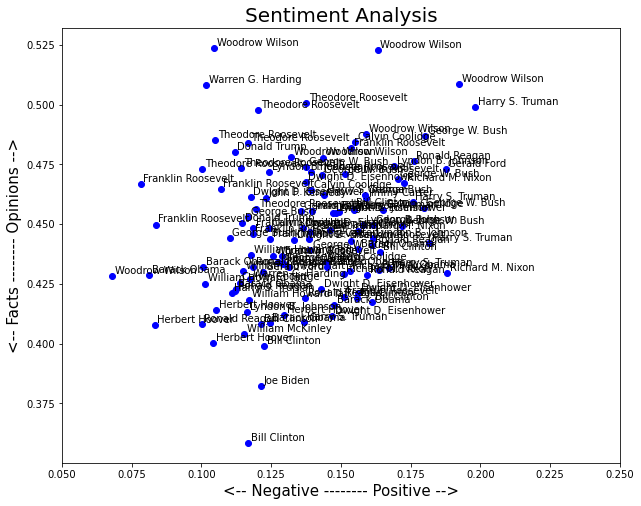

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, president in enumerate(df.index):
    x = df.Polarity.loc[president]
    y = df.Subjectivity.loc[president]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['President'][index], fontsize=10)
    plt.xlim(.05, .25)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [13]:
first_clean = lambda x: clean_text(x)

data_clean = pd.DataFrame(df.Speech.apply(first_clean))
data_clean

,Speech
0,"[senate, house, representatives, outgoing, old..."
1,"[senate, house, representatives, congress, ass..."
2,"[senate, house, representatives, still, contin..."
3,"[senate, house, representatives, country, cong..."
4,"[senate, house, representatives, nation, conti..."
5,"[senate, house, representatives, people, count..."
6,"[senate, house, representatives, nation, still..."
7,"[senate, house, representatives, nation, great..."
8,"[senate, house, representatives, finances, fin..."
9,"[relations, united, states, foreign, governmen..."


In [14]:
#saving full data set without any cleaing. 

#df.to_pickle("speech_data_raw.pkl")


#saving clean_speeches only
#data_clean.to_pickle('clean_speech.pkl')

In [15]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_seq_items = 2000

data_clean.loc[[1,5,7]]

,Speech
1,"[senate, house, representatives, congress, assembles, year, shadow, great, calamity, sixth, september, president, mckinley, shot, anarchist, attending, panamerican, exposition, buffalo, died, city, fourteenth, month, last, seven, elected, presidents, third, murdered, bare, recital, fact, sufficient, justify, grave, alarm, among, loyal, american, citizens, moreover, circumstances, third, assassination, american, president, peculiarly, sinister, significance, president, lincoln, president, garfield, killed, assassins, types, unfortunately, uncommon, history, president, lincoln, falling, victim, terrible, passions, aroused, four, years, civil, war, president, garfield, revengeful, vanity, disappointed, officeseeker, president, mckinley, killed, utterly, depraved, criminal, belonging, body, criminals, object, governments, good, bad, alike, form, popular, liberty, guaranteed, even, liberal, laws, hostile, upright, exponent, free, people, sober, tyrannical, irresponsible, despot, much, s..."
5,"[senate, house, representatives, people, country, continue, enjoy, great, prosperity, undoubtedly, ebb, flow, prosperity, ebb, flow, felt, less, members, community, deserving, undeserving, wrath, lord, wisdom, man, avail, time, flood, drought, human, ingenuity, partially, repair, disaster, general, failure, crops, would, hurt, us, folly, man, mars, general, wellbeing, innocent, folly, pay, part, penalty, incurred, guilty, folly, panic, brought, speculative, folly, part, business, community, would, hurt, whole, business, community, stoppage, welfare, though, might, severe, would, lasting, long, run, one, vital, factor, permanent, prosperity, country, high, individual, character, average, american, worker, average, american, citizen, matter, whether, work, mental, manual, whether, farmer, wageworker, business, man, professional, man, industrial, social, system, interests, men, closely, intertwined, immense, majority, cases, straightdealing, man, efficiency, ingenuity, industry, benef..."
7,"[senate, house, representatives, nation, greater, resources, think, truthfully, said, citizens, nation, possess, greater, energy, industrial, ability, nation, fundamental, business, conditions, sounder, moment, foolish, case, people, hoard, money, instead, keeping, sound, banks, hoarding, immediate, occasion, money, stringency, moreover, rule, business, people, conducted, honesty, probity, applies, alike, farms, factories, railroads, banks, legitimate, commercial, enterprises, large, body, men, however, certain, dishonest, conditions, men, prosper, commit, misdeeds, impunity, example, evil, thing, community, men, business, men, great, sagacity, temperament, unscrupulous, reckless, conditions, act, without, supervision, control, first, without, effective, check, public, opinion, delude, many, innocent, people, making, investments, embarking, kinds, business, really, unsound, misdeeds, successfully, dishonest, men, discovered, suffering, comes, upon, upon, innocent, men, misled, pain..."


In [16]:
df.loc[[1,5,7]]

,Year,President,Party,Speech,Polarity,Subjectivity
1,1901,Theodore Roosevelt,Republican,"To the Senate and House of Representatives: \nThe Congress assembles this year under the shadow of a great calamity. On the sixth of September, President McKinley was shot by an anarchist while attending the Pan-American Exposition at Buffalo, and died in that city on the fourteenth of that month. \nOf the last seven elected Presidents, he is the third who has been murdered, and the bare recital of this fact is sufficient to justify grave alarm among all loyal American citizens. Moreover, the circumstances of this, the third assassination of an American President, have a peculiarly sinister significance. Both President Lincoln and President Garfield were killed by assassins of types unfortunately not uncommon in history; President Lincoln falling a victim to the terrible passions aroused by four years of civil war, and President Garfield to the revengeful vanity of a disappointed office-seeker. President McKinley was killed by an utterly depraved criminal belonging to that body of ...",0.139217,0.471688
5,1905,Theodore Roosevelt,Republican,"To the Senate and House of Representatives: \nThe people of this country continue to enjoy great prosperity. Undoubtedly there will be ebb and flow in such prosperity, and this ebb and flow will be felt more or less by all members of the community, both by the deserving and the undeserving. Against the wrath of the Lord the wisdom of man cannot avail; in time of flood or drought human ingenuity can but partially repair the disaster. A general failure of crops would hurt all of us. Again, if the folly of man mars the general well-being, then those who are innocent of the folly will have to pay part of the penalty incurred by those who are guilty of the folly. A panic brought on by the speculative folly of part of the business community would hurt the whole business community. But such stoppage of welfare, though it might be severe, would not be lasting. In the long run the one vital factor in the permanent prosperity of the country is the high individual character of the average Ame...",0.116702,0.483900
7,1907,Theodore Roosevelt,Republican,"To the Senate and House of Representatives: \nNo nation has greater resources than ours, and I think it can be truthfully said that the citizens of no nation possess greater energy and industrial ability. In no nation are the fundamental business conditions sounder than in ours at this very moment; and it is foolish, when such is the case, for people to hoard money instead of keeping it in sound banks; for it is such hoarding that is the immediate occasion of money stringency. Moreover, as a rule, the business of our people is conducted with honesty and probity, and this applies alike to farms and factories, to railroads and banks, to all our legitimate commercial enterprises. \nIn any large body of men, however, there are certain to be some who are dishonest, and if the conditions are such that these men prosper or commit their misdeeds with impunity, their example is a very evil thing for the community. Where these men are business men of great sagacity and of temperament both un...",0.114113,0.473520


In [22]:
df_csv = pd.read_csv('data/gdp.csv')
df_csv.rename(columns={'date': 'year', 'change-chained' : 'GDP'}, inplace=True)

gdp = df_csv.iloc[:, [0, 4]]

gdp.sort_values(by=['year'], inplace=True)
print(gdp)

#print(gdp.head())
#print(gdp.tail())

    year   GDP
0   1930  -6.4
1   1931 -12.9
2   1932  -1.3
3   1933  10.8
4   1934   8.9
5   1935  12.9
6   1936   5.1
7   1937  -3.3
8   1938   8.0
9   1939   8.8
10  1940  17.7
11  1941  18.9
12  1942  17.0
13  1943   8.0
14  1944  -1.0
15  1945 -11.6
16  1946  -1.1
17  1947   4.1
18  1948  -0.5
19  1949   8.7
20  1950   8.1
21  1951   4.1
22  1952   4.7
23  1953  -0.6
24  1954   7.1
25  1955   2.1
26  1956   2.1
27  1957  -0.7
28  1958   6.9
29  1959   2.6
30  1960   2.6
31  1961   6.1
32  1962   4.4
33  1963   5.8
34  1964   6.5
35  1965   6.6
36  1966   2.7
37  1967   4.9
38  1968   3.1
39  1969   0.2
40  1970   3.3
41  1971   5.2
42  1972   5.6
43  1973  -0.5
44  1974  -0.2
45  1975   5.4
46  1976   4.6
47  1977   5.6
48  1978   3.2
49  1979  -0.2
50  1980   2.6
51  1981  -1.9
52  1982   4.6
53  1983   7.3
54  1984   4.2
55  1985   3.5
56  1986   3.5
57  1987   4.2
58  1988   3.7
59  1989   1.9
60  1990  -0.1
61  1991   3.6
62  1992   2.7
63  1993   4.0
64  1994   2.7
65  1995  

In [18]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from modules.cleaners import simple_clean


file = 'speeches/2010.txt'
f = open(file, encoding='utf8', errors='ignore')
filetxt = f.read()

speech = simple_clean(filetxt)


model_name = "MoritzLaurer/policy-distilbert-7d"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


text = "The new variant first detected in southern England in September is " \
       "blamed for sharp rises in levels of positive tests in recent weeks in " \
       "London, south-east England and the east of England "

input = tokenizer(text, truncation=True, return_tensors="pt")

output = model(input["input_ids"])
# the output corresponds to the following labels: 0: external relations,
# 1: freedom and democracy, 2: political system, 3: economy, 4: welfare and
# quality of life, 5: fabric of society, 6: social groups output to dictionary
prediction = torch.softmax(output["logits"][0], -1).tolist()

label_names = ["external relations", "freedom and democracy",
               "political system", "economy", "welfare and quality of life",
               "fabric of society", "social groups"]
prediction = {name: round(float(pred) * 100, 1) for pred, name in
              zip(prediction, label_names)}
print(prediction)


{'external relations': 0.0, 'freedom and democracy': 0.0, 'political system': 0.9, 'economy': 0.4, 'welfare and quality of life': 98.3, 'fabric of society': 0.3, 'social groups': 0.0}


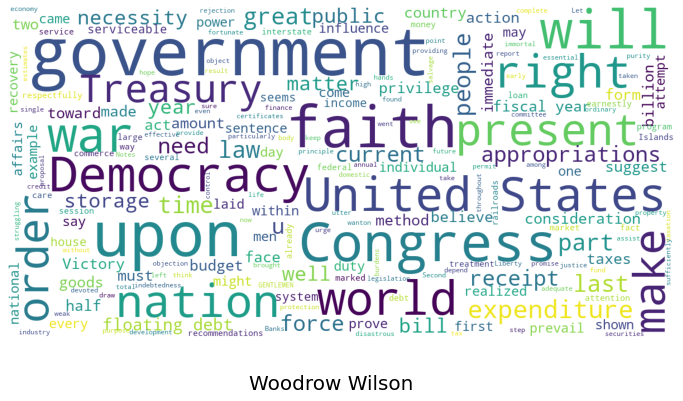

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
sample = df.loc[20, 'Speech']
sample
show_wordcloud(sample, df.loc[20, 'President'])